In [117]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from nltk.tokenize import word_tokenize
import nltk.corpus

### Useful Resources

1. https://pudding.cool/2017/08/the-office/
2. https://simpletexting.com/the-office-dialogue-analysis/

In [118]:
df = pd.read_csv("The_Office_lines.csv", index_col='id')
df.drop(['scene'], axis = 1, inplace=True)
df.rename({'line_text': 'line'}, axis=1, inplace=True)
df.head()

,season,episode,line,speaker,deleted
id,,,,,
1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
2,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
3,1,1,So you've come to the master for guidance? Is ...,Michael,False
4,1,1,"Actually, you called me in here, but yeah.",Jim,False
5,1,1,"All right. Well, let me show you how it's done.",Michael,False


In [119]:
pd.set_option("display.max_rows", None)
lines_spoken = df.speaker.value_counts()[:20]
lines_spoken

Michael     12145
Dwight       7532
Jim          6814
Pam          5375
Andy         3969
Kevin        1709
Angela       1695
Oscar        1491
Erin         1469
Ryan         1379
Darryl       1281
Phyllis      1071
Kelly         956
Jan           949
Toby          936
Stanley       761
Meredith      645
Holly         609
Nellie        529
Creed         456
Name: speaker, dtype: int64

In [120]:
fig = px.bar(lines_spoken, title='Lines spoken by popular characters')
fig.show()

In [121]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [122]:
with open('most_common_english_words.txt', 'r') as file:
    most_common = [i.strip('\n') for i in file.readlines()]

In [123]:
stopwords = set(nltk.corpus.stopwords.words('english'))
print(stopwords)
michael_lines = df.loc[df['speaker'] == 'Michael', 'line']
michael_words = []
for line in michael_lines:
    words = tokenizer.tokenize(line)
    michael_words.extend(words)

michael_words = [word.lower() for word in michael_words]
michael_words = list(filter(lambda x: x not in most_common, michael_words))
michael_words = list(filter(lambda x: x not in stopwords, michael_words))
michael_words = list(filter(lambda x: len(x) > 2, michael_words))

{'which', 'couldn', 'who', 'were', 'out', "hadn't", 'had', 'its', 'on', "don't", 'off', 'if', 'doing', 'as', "you'd", 'nor', 'more', 'him', 'then', "wasn't", 'been', 'his', "you're", "isn't", 'most', 'further', 'and', 'these', 'against', 'such', "she's", 'weren', 'y', 'ma', 'o', 'where', 'can', 'my', 'down', 'in', 'ain', "that'll", 'doesn', 'have', 'before', "didn't", 'our', 'won', 'after', 'aren', 'itself', 'himself', 'over', 'with', 'yourself', 'or', 'while', 'few', "shouldn't", 'this', 'herself', 'both', 'but', 'd', "mightn't", 'them', 'theirs', 'yourselves', 'through', 's', 'they', 'now', 'm', 'having', 'up', 'has', 'no', "it's", "haven't", 'of', 'we', 'ours', 'an', "weren't", 've', 'from', 'by', 'so', 'once', "hasn't", 'myself', 'being', 'at', 'what', 'too', 'are', 'each', "wouldn't", 'hadn', 'needn', 'her', 'other', 'mustn', 'those', 't', "mustn't", 'was', 'about', 'shouldn', 'he', 'will', 'haven', 'again', 'the', 'how', 'is', 'll', 'between', 'until', 'because', 'it', 'their', '

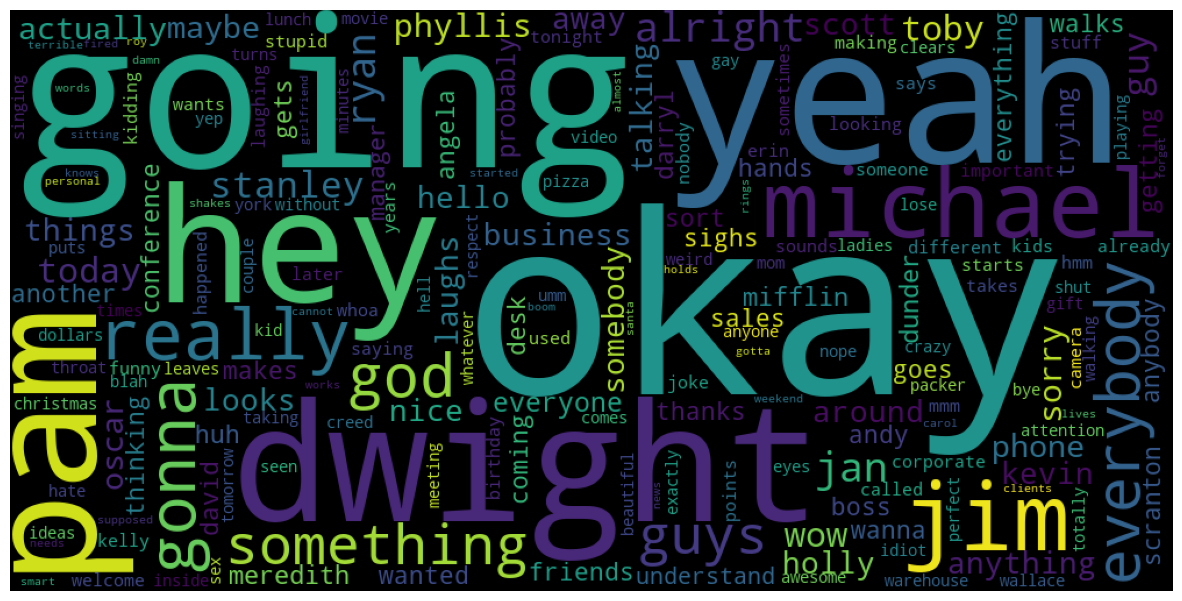

In [124]:
#convert it to dictionary with values and its occurences
from collections import Counter
word_could_dict = Counter(michael_words)
wordcloud = WordCloud(width = 1000, height = 500).generate_from_frequencies(word_could_dict)

plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()